<a href="https://colab.research.google.com/github/hug627/streamlit-for-30-days/blob/main/ridge%2Classo%2Clinear%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error

# Load California housing dataset
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target

print(X.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [2]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [16]:
# Use only one feature: Median Income
X_simple = X[['MedInc']]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Fit model
slr = LinearRegression()
slr.fit(X_train, y_train)
y_pred = slr.predict(X_test)

# Evaluation
print("Simple Linear Regression")
print("Coefficient:", slr.coef_)
print("Intercept:", slr.intercept_)
print("MSE:", root_mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

Simple Linear Regression
Coefficient: [0.41933849]
Intercept: 0.4445972916907879
MSE: 0.8420901241414455
R2: 0.45885918903846656


In [4]:
results = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})
results["Error"] = results["Actual"] - results["Predicted"]
results["AbsoluteError"] = results["Error"].abs()

results.head(10) # show first 10 comparisons

,Actual,Predicted,Error,AbsoluteError
0,0.47700,1.149589,-0.672589,0.672589
1,0.45800,1.506069,-1.048069,1.048069
2,5.00001,1.903937,3.096073,3.096073
3,2.18600,2.850594,-0.664594,0.664594
4,2.78000,2.006633,0.773367,0.773367
5,1.58700,2.421652,-0.834652,0.834652
6,1.98200,2.576472,-0.594472,0.594472
7,1.57500,1.992292,-0.417292,0.417292
8,3.40000,2.458932,0.941068,0.941068
9,4.46600,3.846774,0.619226,0.619226


# Breakdown

y = 0.41933849x +  0.4445972916907879 +  0.84

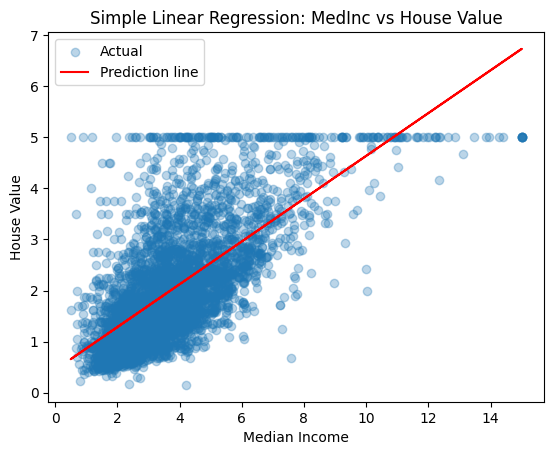

In [17]:
#Plot
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, alpha=0.3, label="Actual")
plt.plot(X_test, y_pred, color="red", label="Prediction line")
plt.xlabel("Median Income")
plt.ylabel("House Value")
plt.title("Simple Linear Regression: MedInc vs House Value")
plt.legend()
plt.show()

In [18]:
# Use all predictors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred = mlr.predict(X_test)

print("\nMultiple Linear Regression")
print("Coefficients:", mlr.coef_)
print("Intercept:", mlr.intercept_)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))


Multiple Linear Regression
Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Intercept: -37.02327770606409
MSE: 0.5558915986952444
R2: 0.5757877060324508


In [19]:
results = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})
results["Error"] = results["Actual"] - results["Predicted"]
results["AbsoluteError"] = results["Error"].abs()

results.head(10) # show first 10 comparisons

,Actual,Predicted,Error,AbsoluteError
0,0.47700,0.719123,-0.242123,0.242123
1,0.45800,1.764017,-1.306017,1.306017
2,5.00001,2.709659,2.290351,2.290351
3,2.18600,2.838926,-0.652926,0.652926
4,2.78000,2.604657,0.175343,0.175343
5,1.58700,2.011754,-0.424754,0.424754
6,1.98200,2.645500,-0.663500,0.663500
7,1.57500,2.168755,-0.593755,0.593755
8,3.40000,2.740746,0.659254,0.659254
9,4.46600,3.915615,0.550385,0.550385


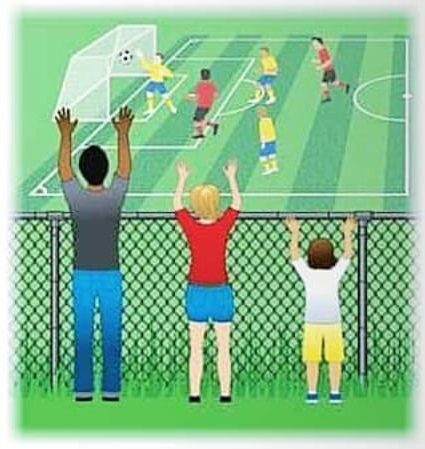

In [21]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [22]:
X_train_scaled

array([[-0.326196  ,  0.34849025, -0.17491646, ...,  0.05137609,
        -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, ..., -0.11736222,
        -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, ..., -0.03227969,
        -0.46014647, -0.44760309],
       ...,
       [-0.49697313,  0.58654547, -0.60675918, ...,  0.02030568,
        -0.75500738,  0.59946887],
       [ 0.96545045, -1.07984112,  0.40217517, ...,  0.00707608,
         0.90651045, -1.18553953],
       [-0.68544764,  1.85617335, -0.85144571, ..., -0.08535429,
         0.99543676, -1.41489815]])

In [23]:
0.40* 340 + 0.12* 56


142.72

In [24]:
ridge = Ridge(alpha=1.0)   # alpha = λ = regularization strength
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)

print("Ridge Regression")
print("Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)
print("MSE:", mean_squared_error(y_test, ridge_pred))
print("R2:", r2_score(y_test, ridge_pred))

Ridge Regression
Coefficients: [ 0.85432679  0.12262397 -0.29421036  0.33900794 -0.00228221 -0.04083302
 -0.89616759 -0.86907074]
Intercept: 2.0719469373788777
MSE: 0.5558548589435971
R2: 0.5758157428913684


In [25]:
ridge = Ridge(alpha=1.0)   # alpha = λ = regularization strength
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

print("Ridge Regression")
print("Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)
print("MSE:", mean_squared_error(y_test, ridge_pred))
print("R2:", r2_score(y_test, ridge_pred))

Ridge Regression
Coefficients: [ 4.48510924e-01  9.72596535e-03 -1.23014157e-01  7.81416761e-01
 -2.02581346e-06 -3.52585878e-03 -4.19786908e-01 -4.33680793e-01]
Intercept: -37.019419838012496
MSE: 0.5558034669932211
R2: 0.5758549611440126


In [26]:
results = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": ridge_pred
})
results["Error"] = results["Actual"] - results["Predicted"]
results["AbsoluteError"] = results["Error"].abs()

results.head(10) # show first 10 comparisons

,Actual,Predicted,Error,AbsoluteError
0,0.47700,0.719240,-0.242240,0.242240
1,0.45800,1.763951,-1.305951,1.305951
2,5.00001,2.709092,2.290918,2.290918
3,2.18600,2.838976,-0.652976,0.652976
4,2.78000,2.604768,0.175232,0.175232
5,1.58700,2.011791,-0.424791,0.424791
6,1.98200,2.645591,-0.663591,0.663591
7,1.57500,2.168770,-0.593770,0.593770
8,3.40000,2.740131,0.659869,0.659869
9,4.46600,3.915568,0.550432,0.550432


In [1]:
print([ 4.48674910e-01,  9.72425752e-03, -1.23323343e-01,  7.83144907e-01,
 -2.02962058e-06, -3.52631849e-03, -4.19792487e-01, -4.33708065e-01])

[0.44867491, 0.00972425752, -0.123323343, 0.783144907, -2.02962058e-06, -0.00352631849, -0.419792487, -0.433708065]


In [3]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)   # smaller alpha for Lasso
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)

print("\nLasso Regression")
print("Coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)
print("MSE:", mean_squared_error(y_test, lasso_pred))
print("R2:", r2_score(y_test, lasso_pred))

NameError: name 'X_train_scaled' is not defined

In [ ]:
lasso = Lasso(alpha=0.01)   # smaller alpha for Lasso
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print("\nLasso Regression")
print("Coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)
print("MSE:", mean_squared_error(y_test, lasso_pred))
print("R2:", r2_score(y_test, lasso_pred))

In [ ]:
results = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": lasso_pred
})
results["Error"] = results["Actual"] - results["Predicted"]
results["AbsoluteError"] = results["Error"].abs()

results.head(10) # show first 10 comparisons

In [ ]:
Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]

In [ ]:
X_train.columns

In [ ]:

import matplotlib.pyplot as plt

features = X.columns

plt.figure(figsize=(12,6))
plt.bar(features, mlr.coef_, alpha=0.6, label="Multiple Linear")
plt.bar(features, ridge.coef_, alpha=0.6, label="Ridge")
plt.bar(features, lasso.coef_, alpha=0.6, label="Lasso")
plt.xticks(rotation=45)
plt.ylabel("Coefficient value")
plt.title("MLR vs Ridge vs Lasso Coefficients - California Housing")
plt.legend()
plt.show()

In [ ]:
lasso = Lasso(alpha=0.01)   # smaller alpha for Lasso
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print("\nLasso Regression")
print("Coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)
print("MSE:", mean_squared_error(y_test, lasso_pred))
print("R2:", r2_score(y_test, lasso_pred))

In [ ]:

# Example custom input
new_house = pd.DataFrame([{
    "MedInc": 8.3,       # median income in $10,000s
    "HouseAge": 25,
    "AveRooms": 7,
    "AveBedrms": 1,
    "Population": 500,
    "AveOccup": 3,
    "Latitude": 34.5,
    "Longitude": -118.5
}])

# Predict with Linear Regression
predicted_value = mlr.predict(new_house)
print("Predicted house value:", predicted_value[0].round(2), "($100,000s)")


In [ ]:
predicted_value = ridge.predict(new_house)
print("Predicted house value:", predicted_value[0].round(2), "($100,000s)")

In [ ]:
predicted_value = lasso.predict(new_house)
print("Predicted house value:", predicted_value[0].round(), "($100,000s)")

In [ ]:
import pickle

In [ ]:
with open('linear_model.pkl','wb') as f:
  pickle.dump(mlr,f)

In [ ]:
with open('linear_model.pkl','rb') as f:
  multiple_lr = pickle.load(f)

In [ ]:

# Example custom input
new_house = pd.DataFrame([{
    "MedInc": 8.3,       # median income in $10,000s
    "HouseAge": 25,
    "AveRooms": 7,
    "AveBedrms": 1,
    "Population": 500,
    "AveOccup": 3,
    "Latitude": 34.5,
    "Longitude": -118.5
}])

# Predict with Linear Regression
predicted_value = multiple_lr.predict(new_house)
print("Predicted house value:", predicted_value[0].round(2), "($100,000s)")


Please run the cell with id `FqqSDiVpM-_l` above to scale the data before running the Lasso regression.

In [4]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)   # smaller alpha for Lasso
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)

print("\nLasso Regression")
print("Coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)
print("MSE:", mean_squared_error(y_test, lasso_pred))
print("R2:", r2_score(y_test, lasso_pred))

NameError: name 'X_train_scaled' is not defined